# Books

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
book_df=pd.read_csv('book.csv')
book_df.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [3]:
book_new=book_df.melt(var_name='books',value_name='values')
book_new

,books,values
0,ChildBks,0
1,ChildBks,1
2,ChildBks,0
3,ChildBks,1
4,ChildBks,0
...,...,...
21995,Florence,1
21996,Florence,0
21997,Florence,0
21998,Florence,0


In [4]:
books=pd.crosstab(index=book_new['values'],columns=book_new['books'])
books

books,ArtBks,ChildBks,CookBks,DoItYBks,Florence,GeogBks,ItalArt,ItalAtlas,ItalCook,RefBks,YouthBks
values,,,,,,,,,,,
0,1518,1154,1138,1436,1783,1448,1903,1926,1773,1571,1505
1,482,846,862,564,217,552,97,74,227,429,495


<AxesSubplot:xlabel='books'>

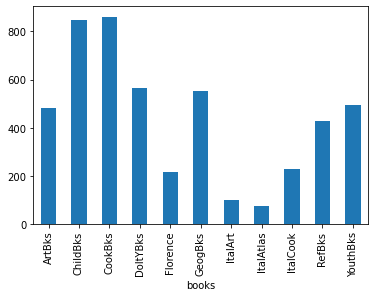

In [5]:
books.iloc[1,:].plot(kind='bar')

<AxesSubplot:xlabel='books'>

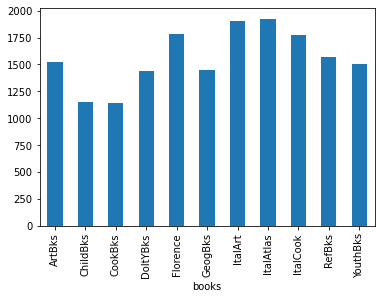

In [6]:
books.iloc[0,:].plot(kind='bar')

In [7]:
freq_items=apriori(book_df,min_support=.005,max_len=3,use_colnames=True)
freq_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(GeogBks, Florence, ItalCook)"
220,0.0115,"(ItalArt, ItalAtlas, GeogBks)"
221,0.0090,"(ItalArt, Florence, GeogBks)"
222,0.0125,"(ItalCook, ItalArt, ItalAtlas)"


In [8]:
freq_items.sort_values('support',ascending=False,inplace=True)
freq_items

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(CookBks, ChildBks)"
...,...,...
206,0.0065,"(Florence, ItalAtlas, RefBks)"
64,0.0065,"(Florence, ItalAtlas)"
207,0.0055,"(ItalArt, Florence, RefBks)"
109,0.0055,"(Florence, ItalAtlas, ChildBks)"


In [9]:
rules=association_rules(freq_items,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
...,...,...,...,...,...,...,...,...,...
1049,"(ItalArt, YouthBks)",(Florence),0.0230,0.1085,0.0055,0.239130,2.203967,0.003004,1.171686
1050,"(Florence, YouthBks)",(ItalArt),0.0255,0.0485,0.0055,0.215686,4.447140,0.004263,1.213163
1051,(ItalArt),"(Florence, YouthBks)",0.0485,0.0255,0.0055,0.113402,4.447140,0.004263,1.099145
1052,(Florence),"(ItalArt, YouthBks)",0.1085,0.0230,0.0055,0.050691,2.203967,0.003004,1.029170


In [10]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
749,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
752,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
744,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
745,(ItalArt),"(ItalAtlas, ArtBks)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
352,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
...,...,...,...,...,...,...,...,...,...
300,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
410,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
411,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
306,(Florence),(CookBks),0.1085,0.4310,0.0475,0.437788,1.015749,0.000737,1.012074


<ipython-input-11-7b801eeb01ba>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x=list(range(0,10)),height=freq_items.support[0:10],color='rgbkymc')


([<matplotlib.axis.XTick at 0x1e04267f9d0>,
 [Text(0, 0, "frozenset({'CookBks'})"),
  Text(1, 0, "frozenset({'ChildBks'})"),
  Text(2, 0, "frozenset({'DoItYBks'})"),
  Text(3, 0, "frozenset({'GeogBks'})"),
  Text(4, 0, "frozenset({'CookBks', 'ChildBks'})"),
  Text(5, 0, "frozenset({'YouthBks'})"),
  Text(6, 0, "frozenset({'ArtBks'})"),
  Text(7, 0, "frozenset({'RefBks'})"),
  Text(8, 0, "frozenset({'GeogBks', 'ChildBks'})"),
  Text(9, 0, "frozenset({'GeogBks', 'CookBks'})")])

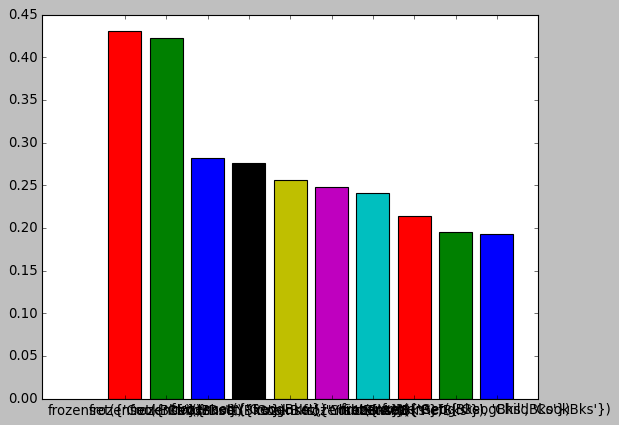

In [11]:
plt.style.use('classic')
plt.bar(x=list(range(0,10)),height=freq_items.support[0:10],color='rgbkymc')
plt.xticks(list(range(0,10)),freq_items.itemsets[0:10])

In [12]:
# To eliminate Redundancy
def to_list(i):
    return(sorted(list(i)))

In [13]:
# Sorting, listing & appending
max=rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
max=max.apply(sorted)

In [14]:
rules_set=list(max)
unique_rules=[list(m) for m in set(tuple(i) for i in rules_set)]

In [15]:
index_rules=[]
for i in unique_rules:
    index_rules.append(rules_set.index(i))

In [16]:
# Getting rules without any redundancy
rules_no_redundancy=rules.iloc[index_rules,:]

In [17]:
# Sorting wrt list and getting top 10
rules_no_redundancy.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1004,"(ItalArt, YouthBks)",(ItalAtlas),0.0230,0.0370,0.0085,0.369565,9.988249,0.007649,1.527517
760,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
896,"(ItalArt, ItalCook)",(ItalAtlas),0.0375,0.0370,0.0125,0.333333,9.009009,0.011113,1.444500
852,"(ItalArt, CookBks)",(ItalAtlas),0.0410,0.0370,0.0130,0.317073,8.569545,0.011483,1.410107
968,"(ItalArt, DoItYBks)",(ItalAtlas),0.0300,0.0370,0.0095,0.316667,8.558559,0.008390,1.409268
...,...,...,...,...,...,...,...,...,...
0,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
430,(Florence),(RefBks),0.1085,0.2145,0.0310,0.285714,1.332001,0.007727,1.099700
300,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
410,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
